In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io
from MyML import *

In [12]:
def dist(a,b):
    return np.sum((a-b)**2, axis  = 1)

In [3]:
full = io.loadmat('shuttle.mat')
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test
fullX = np.array(full['X'], dtype = float)
fullY = full['y']
train,val, test = TVTsplit(np.column_stack((fullX,fullY)))

In [6]:
Xtrainones = train[np.where(train[:,-1] == 1)[0],:-1]
Ytrainones = train[np.where(train[:,-1] == 1)[0],-1]

In [9]:
len(Xtrainones)

2475

In [10]:
len(train)

34367

In [22]:
newX = Xtrainones

In [132]:
D = np.empty((len(newX),len(newX)))
for i in range(len(newX)):
    D[i,] = dist(newX,newX[i])
prednum = np.argsort(D, axis = 1)[:,1:2]

In [133]:
outX = newX.copy()

In [134]:
for i in range(len(prednum)):
    oldpoint = newX[i]
    r = newX[prednum[i]]
    for j in range(len(r)):
        newpoint = oldpoint + np.random.uniform(low = 0,high = 1, size = 1)*(r[j,] - oldpoint)
        outX = np.row_stack((outX,newpoint))

In [135]:
len(outX)

4950

In [136]:
Xtrainzeros = train[np.where(train[:,-1] == 0)[0],:-1]

In [137]:
Xtrain = np.row_stack((Xtrainones,Xtrainzeros))

In [138]:
Ytrain = np.row_stack((np.ones((len(Xtrainones),1)),np.zeros((len(Xtrainzeros),1))))

In [139]:
mins = np.min(Xtrain, axis = 0)
maxs = np.max(Xtrain, axis = 0)
normXtrain = (Xtrain-mins)/(maxs - mins)

In [168]:
model = NeuralNetwork(indims = 9, nodes = [1], activations = [])

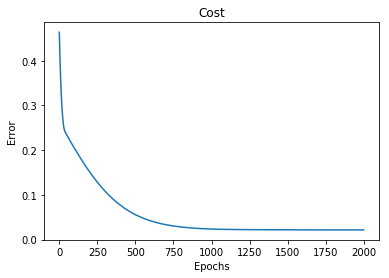

In [169]:
model.train(normXtrain, Ytrain, normXval,Yval.reshape(-1,1), optim = 'adam', epochs = 2000, lr = .01)

In [170]:
Xval = val[:,:-1]
Yval = val[:,-1]
Xtest = test[:,:-1]
Ytest = test[:,-1]

In [171]:
normXval = (Xval - mins)/(maxs - mins)
normXtest = (Xtest  - mins)/(maxs - mins)

# Validation accuracy

In [172]:
model.predict(normXval, p = 1)
valpreds = model.prediction

In [173]:
np.mean(valpreds == Yval.reshape(-1,1))

0.9961982348947725

# Test Accuracy

In [174]:
model.predict(normXtest, p = 1)
testpreds = model.prediction

In [175]:
np.mean(testpreds == Ytest.reshape(-1,1))

0.9970128988458927

In [176]:
np.sum(testpreds*Ytest.reshape(-1,1))/np.sum(Ytest.reshape(-1,1) == 1)

0.9578544061302682